In [3]:
import pandas as pd              
import numpy as np             
import matplotlib.pyplot as plt  
import seaborn as sns            

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")


In [4]:
df = pd.read_csv(r"C:\Users\punee\Downloads\dataset.csv")
df

,Mess_ID,Date,Weekly_Crowd,Is_Holiday,Temperature,Menu_Score,Event_Intensity_Index,Stress_Level
0,1,5/2/2010,16437,0,42.31,2.428,7.04,8.106
1,1,12/2/2010,16420,1,38.51,2.452,7.04,8.106
2,1,19-02-2010,16120,0,39.93,2.486,7.04,8.106
3,1,26-02-2010,14097,0,46.63,2.439,7.04,8.106
4,1,5/3/2010,15548,0,46.50,2.375,7.05,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,7132,0,64.88,1.003,6.40,8.684
6431,45,5/10/2012,7335,0,64.89,1.015,6.41,8.667
6432,45,12/10/2012,7345,0,54.47,1.000,6.41,8.667
6433,45,19-10-2012,7181,0,56.47,1.031,6.41,8.667


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Mess_ID                6435 non-null   int64  
 1   Date                   6435 non-null   object 
 2   Weekly_Crowd           6435 non-null   int64  
 3   Is_Holiday             6435 non-null   int64  
 4   Temperature            6435 non-null   float64
 5   Menu_Score             6435 non-null   float64
 6   Event_Intensity_Index  6435 non-null   float64
 7   Stress_Level           6435 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 402.3+ KB


,Mess_ID,Weekly_Crowd,Is_Holiday,Temperature,Menu_Score,Event_Intensity_Index,Stress_Level
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,10469.649728,0.069930,60.663782,1.641393,5.719394,7.999151
std,12.988182,5643.669226,0.255049,18.444933,0.459020,1.311949,1.875885
min,1.000000,2100.000000,0.000000,-2.060000,0.532000,4.200000,3.879000
25%,12.000000,5533.500000,0.000000,47.460000,1.265000,4.390000,6.891000
50%,23.000000,9607.000000,0.000000,62.670000,1.555000,6.090000,7.874000
75%,34.000000,14201.500000,0.000000,74.940000,2.067000,7.090000,8.622000
max,45.000000,38187.000000,1.000000,100.140000,2.528000,7.570000,14.313000


In [6]:
# Convert all to datetime safely, regardless of / or -
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

df = df.dropna(subset=['Date'])             #Drop any invalid date rows

df['Date'] = df['Date'].dt.strftime('%d-%m-%Y')         # Format all dates as dd-mm-yyyy (with dashes)

df.head()


,Mess_ID,Date,Weekly_Crowd,Is_Holiday,Temperature,Menu_Score,Event_Intensity_Index,Stress_Level
0,1,05-02-2010,16437,0,42.31,2.428,7.04,8.106
1,1,12-02-2010,16420,1,38.51,2.452,7.04,8.106
4,1,05-03-2010,15548,0,46.50,2.375,7.05,8.106
5,1,12-03-2010,14395,0,57.79,2.333,7.05,8.106
8,1,02-04-2010,15950,0,62.27,2.281,7.03,7.808


In [7]:
# Check if any column has missing data
df.isnull().sum()

Mess_ID                  0
Date                     0
Weekly_Crowd             0
Is_Holiday               0
Temperature              0
Menu_Score               0
Event_Intensity_Index    0
Stress_Level             0
dtype: int64

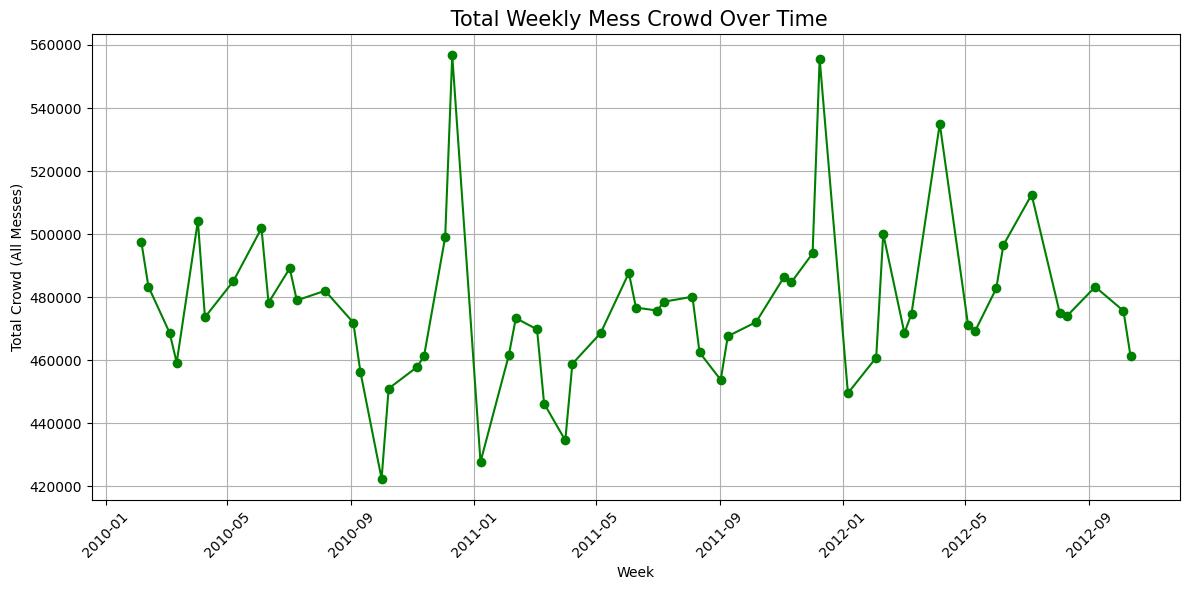

In [8]:
# Convert Date
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

df = df.dropna(subset=['Date'])

# Sort by date
df = df.sort_values(by='Date')

# Group by week across all messes (sum of crowd)
weekly_crowd = df.groupby('Date')['Weekly_Crowd'].sum().reset_index()

# Plot 
plt.figure(figsize=(12, 6))
plt.plot(weekly_crowd['Date'], weekly_crowd['Weekly_Crowd'], color='green', marker='o')
plt.title(" Total Weekly Mess Crowd Over Time", fontsize=15)
plt.xlabel("Week")
plt.ylabel("Total Crowd (All Messes)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


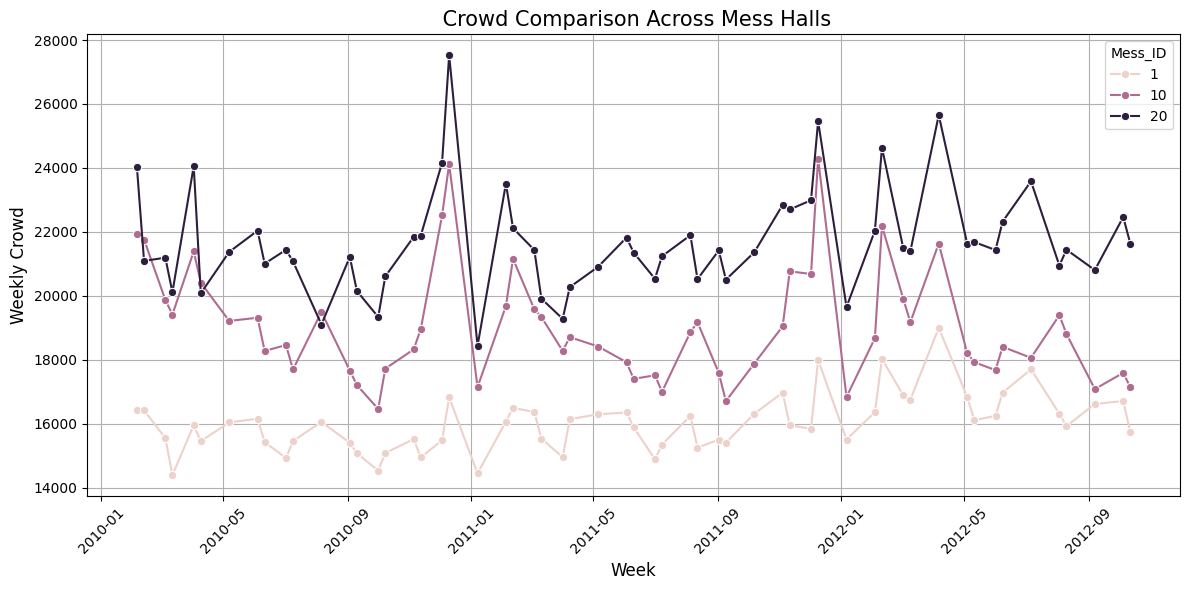

In [9]:
# Choose 2–3 Mess IDs to compare
selected_mess = df[df['Mess_ID'].isin([1, 10, 20])]

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=selected_mess, x='Date', y='Weekly_Crowd', hue='Mess_ID', marker='o')
plt.title(" Crowd Comparison Across Mess Halls", fontsize=15)
plt.xlabel("Week",fontsize=12)
plt.ylabel("Weekly Crowd",fontsize = 12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


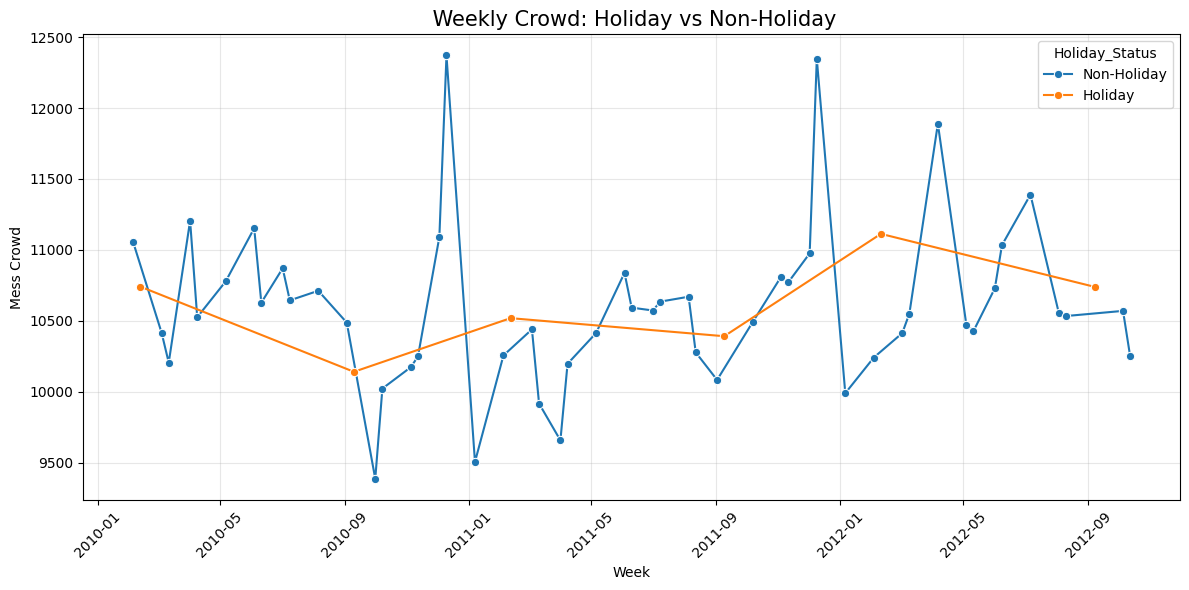

In [10]:


# Plot using seaborn
# Convert Is_Holiday to readable category
df['Holiday_Status'] = df['Is_Holiday'].map({1: 'Holiday', 0: 'Non-Holiday'})
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Weekly_Crowd', hue='Holiday_Status', marker='o',ci=None)

# Titles and labels
plt.title(" Weekly Crowd: Holiday vs Non-Holiday", fontsize=15)
plt.xlabel("Week")
plt.ylabel("Mess Crowd")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [11]:
# Bin values into Low, Medium, High for clarity
df['Menu_Category'] = pd.qcut(df['Menu_Score'], q=3, labels=['Low', 'Medium', 'High'])
df['Event_Intensity'] = pd.qcut(df['Event_Intensity_Index'], q=3, labels=['Low', 'Medium', 'High'])
df['Stress_Level_Cat'] = pd.qcut(df['Stress_Level'], q=3, labels=['Low', 'Medium', 'High'])
df['Temp_Level'] = pd.qcut(df['Temperature'], q=3, labels=['Low', 'Medium', 'High'])

def plot_feature_vs_crowd(category_col, title):
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=df.sort_values('Date'),
        x='Date',
        y='Weekly_Crowd',
        hue=category_col,
        marker='o',
        ci=None
    )
    plt.title(f" Weekly Crowd vs {title}", fontsize=15)
    plt.xlabel("Week")
    plt.ylabel("Weekly Crowd")
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


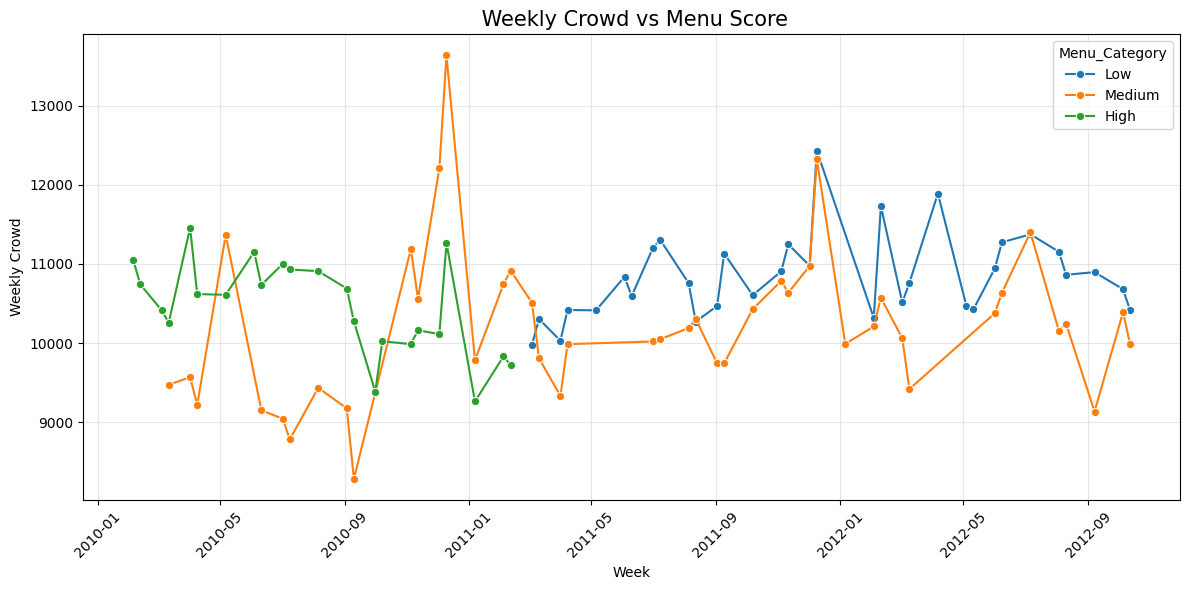

In [12]:
plot_feature_vs_crowd('Menu_Category', 'Menu Score')

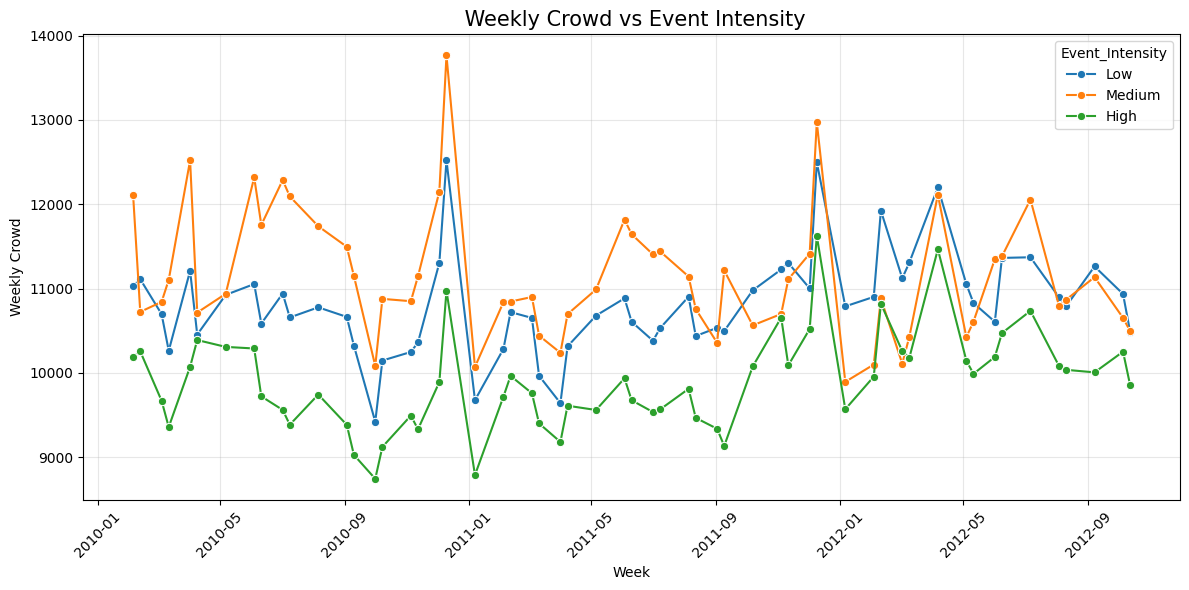

In [13]:
plot_feature_vs_crowd('Event_Intensity', 'Event Intensity')

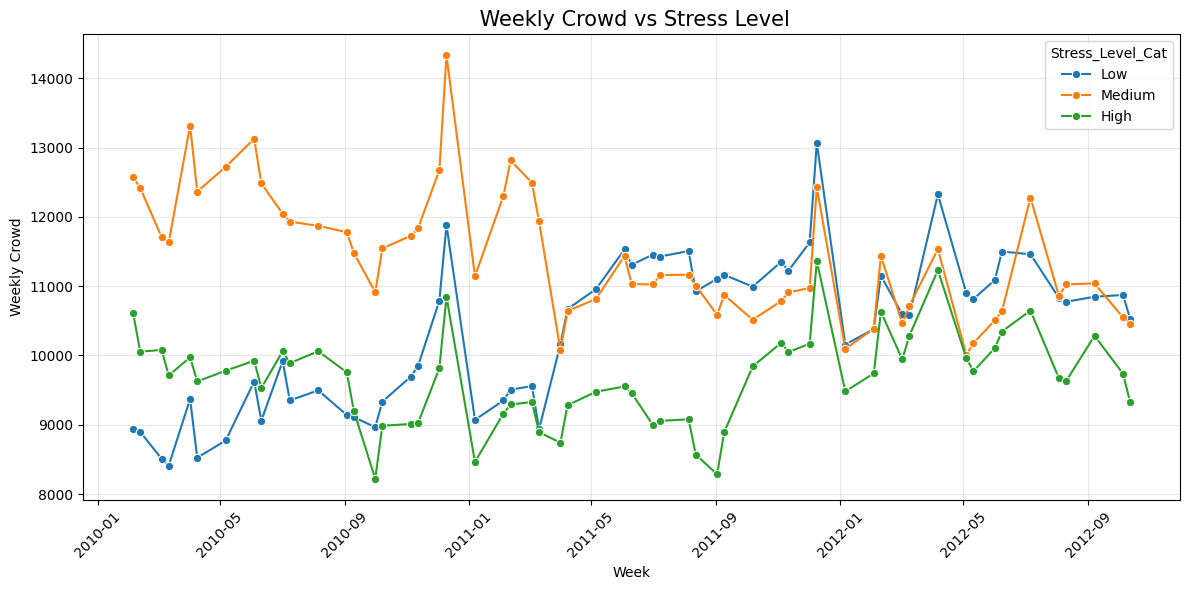

In [14]:
plot_feature_vs_crowd('Stress_Level_Cat', 'Stress Level')

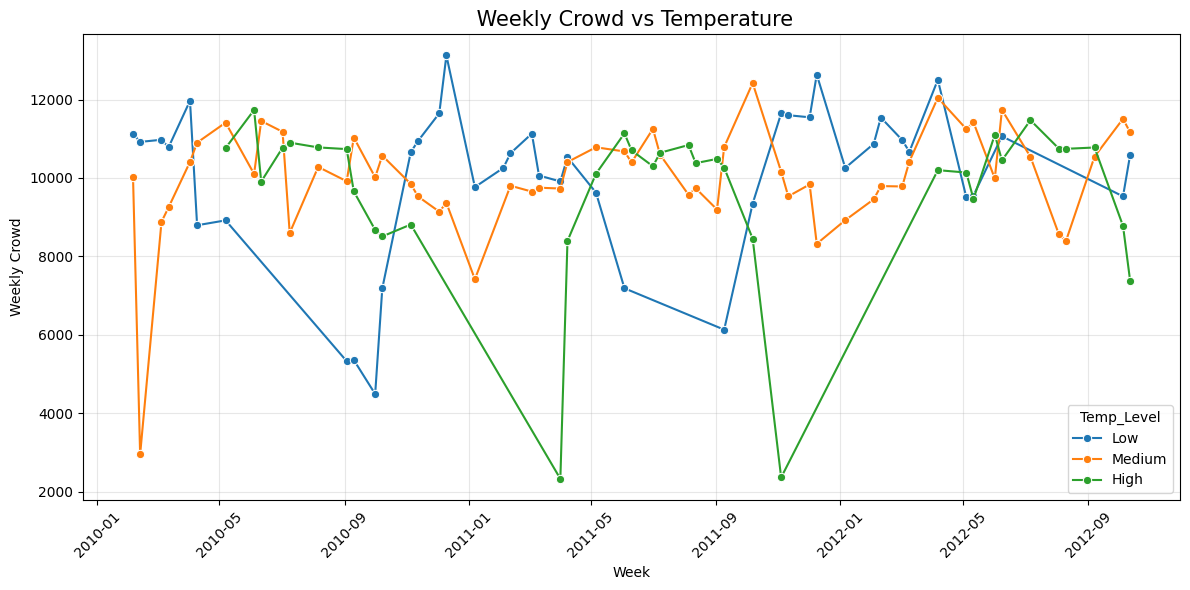

In [15]:
plot_feature_vs_crowd('Temp_Level', 'Temperature')